# Embedded the Python script with Tableau Prep Builder & get all the output coulmns in one schema

#Write a function to do the below steps 

    >Write a script to hit the API 
    > Read the url & converting it to DataFrame
    >Derived a column (By Manupulating the data)
    >Make a function for the whole operation
    >To get all the column in one output schema ,write out_put_schema
    >Alligned the data type & column with prep builder data types

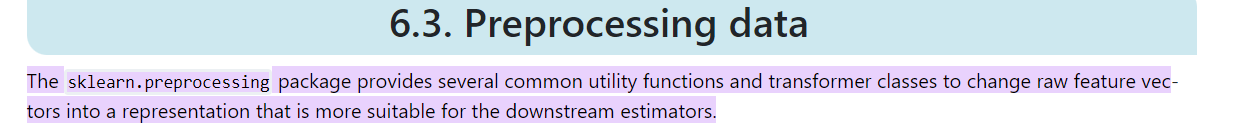

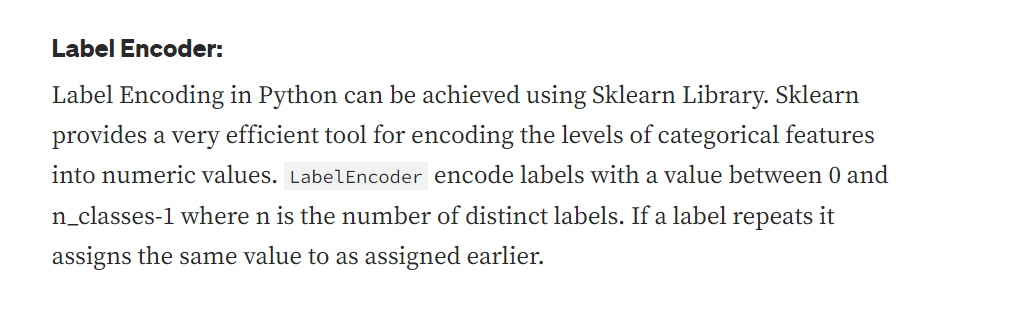

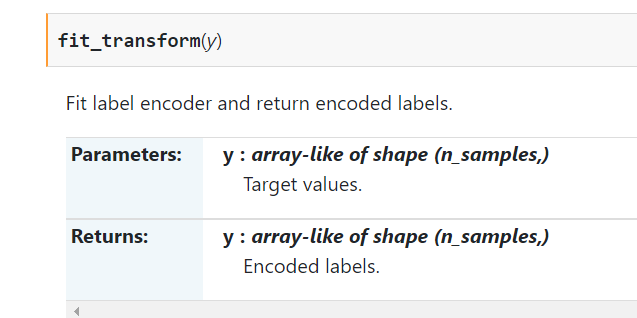

# get_output_schema:

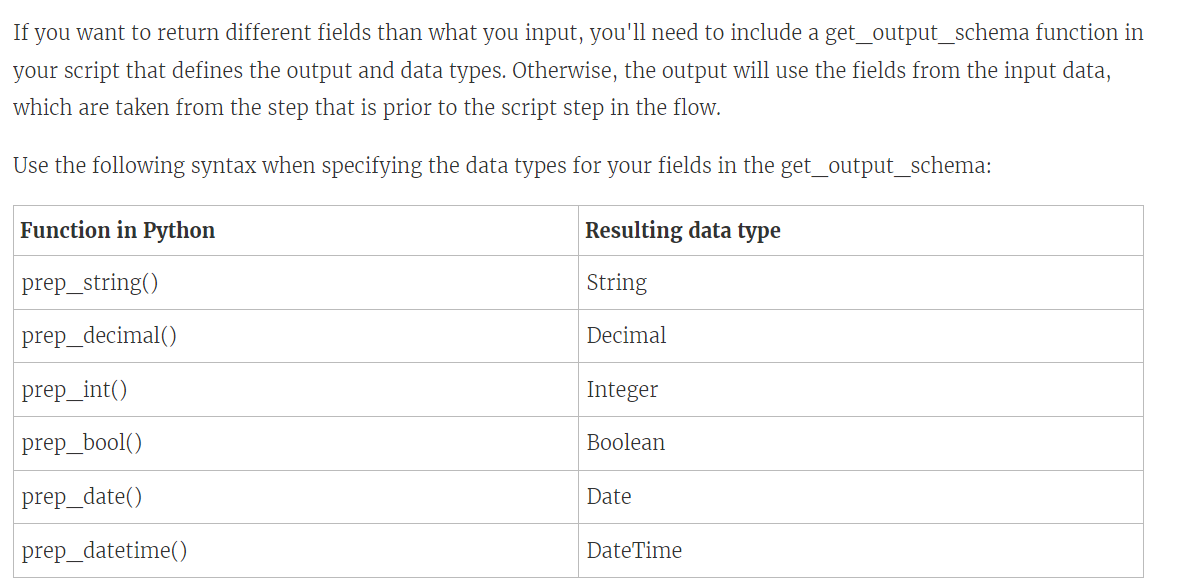

# Add encoding to a set of fields in a flow

> By  LabelEncoder allign the non numerical columns

In [3]:
#Importing all the libraries
import pandas as pd
import numpy as np
import os
import re
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [4]:
#Reading the table from the url
url='https://www.motorbeam.com/top-25-selling-cars-in-february-2023/'
df_car=pd.read_html(url)

In [7]:
df_car

[    Rank       OEM               Model  February ’23 Sales February ’22 Sales  \
 0      1    Maruti              Baleno               18592              12570   
 1      2    Maruti               Swift               18412              19202   
 2      3    Maruti                Alto               18114              11551   
 3      4    Maruti             Wagon R               16889              14669   
 4      5    Maruti               Dzire               16798              17438   
 5      6    Maruti              Brezza               15787               9256   
 6      7      Tata               Nexon               13914              12259   
 7      8    Maruti                Eeco               11352               9190   
 8      9      Tata               Punch               11169               9592   
 9     10   Hyundai               Creta               10421               9606   
 10    11   Hyundai               Venue                9997              10212   
 11    12       

In [8]:
#Checking the type 
type(df_car)

list

In [9]:
#Getting the excat data 
df_car=df_car[0]

In [10]:
#Check the data type,should be data frame
type(df_car)

pandas.core.frame.DataFrame

In [11]:
#Checking the columns details
df_car.head()

,Rank,OEM,Model,February ’23 Sales,February ’22 Sales,YoY Growth
0,1,Maruti,Baleno,18592,12570,48%
1,2,Maruti,Swift,18412,19202,-4%
2,3,Maruti,Alto,18114,11551,57%
3,4,Maruti,Wagon R,16889,14669,15%
4,5,Maruti,Dzire,16798,17438,-4%


In [12]:
#Checking the columns
df_car.columns

Index(['Rank', 'OEM', 'Model', 'February ’23 Sales', 'February ’22 Sales',
       'YoY Growth'],
      dtype='object')

In [13]:
#Checking the datatypes
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                25 non-null     int64 
 1   OEM                 25 non-null     object
 2   Model               25 non-null     object
 3   February ’23 Sales  25 non-null     int64 
 4   February ’22 Sales  25 non-null     object
 5   YoY Growth          25 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


In [15]:
#Remove the ' ' from all the values 
df_car['February ’22 Sales'].values

array(['12570', '19202', '11551', '14669', '17438', '9256', '12259',
       '9190', '9592', '9606', '10212', '6154', '11045', '8552', '5830',
       '–', '6575', '4489', '2610', '11649', '5109', '3668', '5072',
       '4020', '4138'], dtype=object)

In [16]:
#Extracting the string
df_car['February ’22 Sales']=df_car['February ’22 Sales'].str.extract('(\d+)')

In [17]:
#Checking the null value 
df_car.isnull().sum()

Rank                  0
OEM                   0
Model                 0
February ’23 Sales    0
February ’22 Sales    1
YoY Growth            0
dtype: int64

In [18]:
#Find the exact row where the vcalue is null
df_car[df_car['February ’22 Sales'].isnull()]

,Rank,OEM,Model,February ’23 Sales,February ’22 Sales,YoY Growth
15,16,Maruti,Grand Vitara,9183,NaN,–


In [19]:
#Fill the null value with '0',so that we can convert the data type to INT 
df_car['February ’22 Sales']=df_car['February ’22 Sales'].fillna(0)

In [20]:
#Change the data type of the column to int64
df_car['February ’22 Sales']=df_car['February ’22 Sales'].astype(np.int64)

In [21]:
#Check the data type 
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                25 non-null     int64 
 1   OEM                 25 non-null     object
 2   Model               25 non-null     object
 3   February ’23 Sales  25 non-null     int64 
 4   February ’22 Sales  25 non-null     int64 
 5   YoY Growth          25 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.3+ KB


In [22]:
#Derived the column to get the differences
df_car['Sale_Difference']=df_car['February ’23 Sales']-df_car['February ’22 Sales']

In [23]:
#Checking the data frame after derived the column
df_car.head()

,Rank,OEM,Model,February ’23 Sales,February ’22 Sales,YoY Growth,Sale_Difference
0,1,Maruti,Baleno,18592,12570,48%,6022
1,2,Maruti,Swift,18412,19202,-4%,-790
2,3,Maruti,Alto,18114,11551,57%,6563
3,4,Maruti,Wagon R,16889,14669,15%,2220
4,5,Maruti,Dzire,16798,17438,-4%,-640


In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

df_sales=pd.DataFrame()

def sales_car(df_sales):
    url='https://www.motorbeam.com/top-25-selling-cars-in-february-2023/'
    df_sales=pd.read_html(url)[0]
    df_sales['February ’22 Sales']=df_sales['February ’22 Sales'].str.extract('(\d+)')
    df_sales['February ’22 Sales']=df_sales['February ’22 Sales'].fillna(0)
    df_sales['February ’22 Sales']=df_sales['February ’22 Sales'].astype(np.int64)
    df_sales['Sale_Difference']=df_sales['February ’23 Sales']- df_sales['February ’22 Sales']
    
    return(df_sales)

def get_output_schema():
    return pd.DataFrame({
    'Rank' : prep_int(),
    'OEM' : prep_string(),
    'Model' : prep_string(),
    'February ’23 Sales' : prep_int(),
    'February ’22 Sales' : prep_int(),
    'YoY Growth' : prep_string(),
    'Sale_Difference' : prep_int()

})

import pandas as pd
def encode(input):     
  le = preprocessing.LabelEncoder()
  return pd.DataFrame({
    'Rank': le.fit_transform['Rank'],
    'OEM' : le.fit_transform(input['OEM']),
    'Model' : le.fit_transform(input['Model']),
    'February ’23 Sales' : le.fit_transform(input['February ’23 Sales']),
    'February ’22 Sales' : le.fit_transform(input['February ’22 Sales']),
    'YoY Growth' : le.fit_transform(input['YoY Growth']),
    'Sale_Difference' : le.fit_transform(input['Sale_Difference'])
})


In [2]:
sales_car(df_sales).head()

,Rank,OEM,Model,February ’23 Sales,February ’22 Sales,YoY Growth,Sale_Difference
0,1,Maruti,Baleno,18592,12570,48%,6022
1,2,Maruti,Swift,18412,19202,-4%,-790
2,3,Maruti,Alto,18114,11551,57%,6563
3,4,Maruti,Wagon R,16889,14669,15%,2220
4,5,Maruti,Dzire,16798,17438,-4%,-640
